# Q3

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [81]:
def dfs(x, y, im, out, visited):
    if(x<0 or x>=im.shape[0]):  
        return 0
    if(y<0 or y>=im.shape[1]):
        return 0
    if (visited[x,y]==1):
        return 0
    visited[x,y] = 1
    
    if(im[x,y] == 1):
        out[x,y] = 1
        dfs(x+1, y, im, out, visited)
        dfs(x, y+1, im, out, visited)
        dfs(x, y-1, im, out, visited)
        dfs(x-1, y, im, out, visited)  
    
    return 0

def conn4(temp,im):
    out = np.zeros(im.shape)
    visited = np.zeros(im.shape)
    
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            if(visited[i,j]==0 and temp[i,j]==1):
                dfs(i, j, im, out, visited)
    
    return out

# 1. Coins touching the boundary 

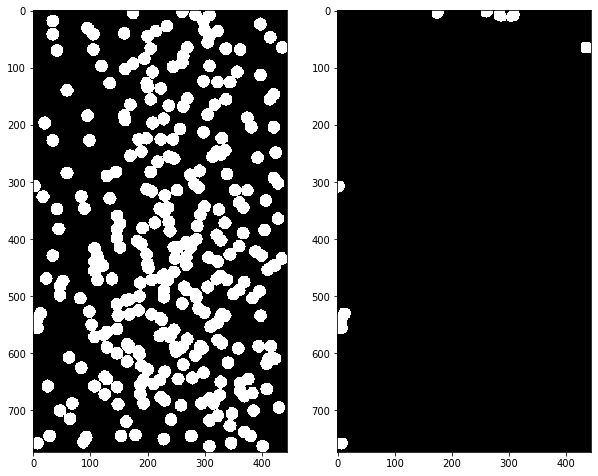

In [82]:
im = cv2.imread('../input_data/coins.jpg', 0)
binary = (im > 127).astype(np.uint8)
se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(8,8))
eroded = cv2.erode(binary, se, iterations=2)
# plt.imshow(eroded,cmap='gray')
# plt.show()

border = np.zeros((im.shape))
border[:,0] = 1
border[:,-1] = 1
border[0,:] = 1
border[-1,:] = 1

temp = np.logical_and(border,eroded).astype(np.uint8)
# plt.imshow(temp,cmap='gray')

out = conn4(temp, eroded)

final = cv2.dilate(out, se, iterations=2)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(binary, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(final, cmap='gray')
plt.show()


# 2. Overlapping Coins

In [86]:
pixels = 0
def dfs(x, y, im, out, visited):
    if(x<0 or x>=im.shape[0]):  
        return 0
    if(y<0 or y>=im.shape[1]):
        return 0
    if (visited[x,y]==1):
        return 0
    
    visited[x,y] = 1
    global pixels
    pixels = pixels +1
    if(im[x,y] == 1):
        out[x,y] = 1
        dfs(x+1, y, im, out, visited)
        dfs(x, y+1, im, out, visited)
        dfs(x, y-1, im, out, visited)
        dfs(x-1, y, im, out, visited)  
    
    return pixels

def conn4_ol(im):
    h, w = im.shape
    out = np.zeros((h, w), dtype = np.uint16)
    visited = np.zeros(im.shape)
    
    overlap = []
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            global pixels
            pixels = 0
            if(visited[i,j]==0 and im[i,j]==1):
                dfs(i, j, im, out, visited)
                if(pixels >= 482):
                    overlap.append([i,j])
                
    
    return overlap



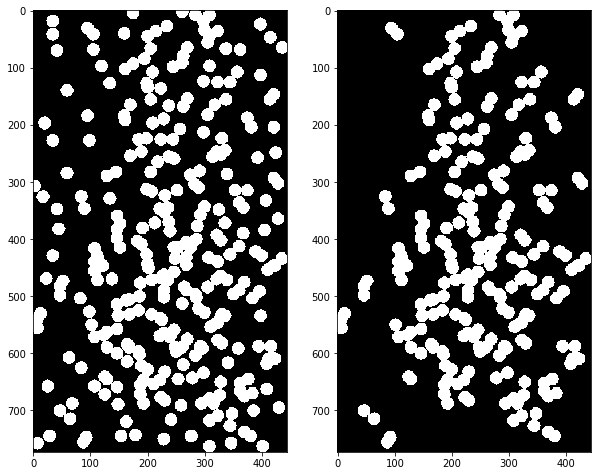

In [87]:
def overlapping(overlap, im):
    visited = np.zeros(im.shape)
    out = np.zeros(im.shape)
    for i in overlap:
        if (visited[i[0], i[1]] == 0) and (im[i[0], i[1]] == 1):
            _=dfs(i[0], i[1], im, out, visited)
    return out

ol_list = conn4_ol(binary)
overlap = overlapping(overlap, binary)
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(binary, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(ol, cmap='gray')
plt.show()


# 3. Non-Overlapping Coins

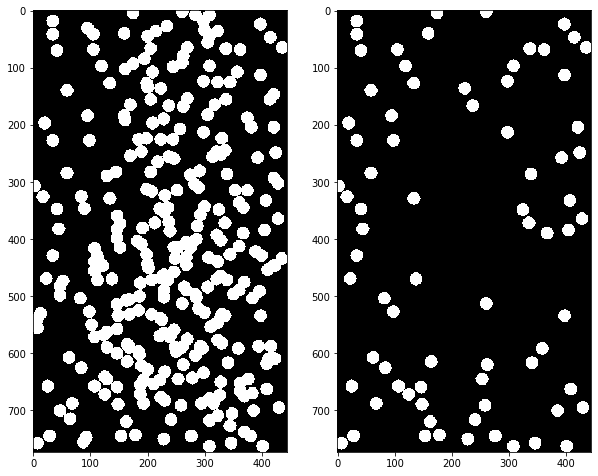

In [78]:
non_overlapping = binary - ol

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(binary, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(non_overlapping, cmap='gray')
plt.show()